In [2]:
import pandas as pd
import numpy as np
import datetime
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last
import os
import seaborn as sns
%matplotlib inline
import matplotlib
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv(open(r"F:\DUFE\2ND semester\python\pythonforDA\CDNOW.txt"),header = None,names=['客户编码','购买日期','数量','金额'],sep = '\s+')


In [6]:
df.head()
df.describe()
df.info()

,客户编码,购买日期,数量,金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


,客户编码,购买日期,数量,金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
客户编码    69659 non-null int64
购买日期    69659 non-null int64
数量      69659 non-null int64
金额      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [9]:
df.客户编码 = df.客户编码.astype('str')
df.购买日期 = pd.to_datetime(df.购买日期, format = '%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
客户编码    69659 non-null object
购买日期    69659 non-null datetime64[ns]
数量      69659 non-null int64
金额      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [12]:
df['购买年'] = df.购买日期.dt.year
df['购买年'] = df['购买年'].astype('int')
df['购买月'] = df.购买日期.dt.month
df['购买月'] = df['购买月'].astype('int')
df['购买日'] = df.购买日期.dt.day
df['购买日'] = df['购买日'].astype('int')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 7 columns):
客户编码    69659 non-null object
购买日期    69659 non-null datetime64[ns]
数量      69659 non-null int64
金额      69659 non-null float64
购买年     69659 non-null int32
购买月     69659 non-null int32
购买日     69659 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(1)
memory usage: 2.9+ MB


,客户编码,购买日期,数量,金额,购买年,购买月,购买日
0,1,1997-01-01,1,11.77,1997,1,1
1,2,1997-01-12,1,12.00,1997,1,12
2,2,1997-01-12,5,77.00,1997,1,12
3,3,1997-01-02,2,20.76,1997,1,2
4,3,1997-03-30,2,20.76,1997,3,30


In [16]:
df['单价'] = df['金额']/df['数量']

df['订单编号']= df.index
df.head()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日,单价,订单编号
0,1,1997-01-01,1,11.77,1997,1,1,11.77,0
1,2,1997-01-12,1,12.00,1997,1,12,12.00,1
2,2,1997-01-12,5,77.00,1997,1,12,15.40,2
3,3,1997-01-02,2,20.76,1997,1,2,10.38,3
4,3,1997-03-30,2,20.76,1997,3,30,10.38,4


In [18]:
Price_year = df.groupby(['购买年'])[['金额','数量']].sum()
Price_year['单价'] = Price_year['金额']/Price_year['数量']
Price_year

,金额,数量,单价
购买年,,,
1997,2024161.26,134945,14.999898
1998,476154.37,32936,14.456958


<class 'pandas.core.frame.DataFrame'>
Index: 5374 entries, 100 to 9993
Data columns (total 2 columns):
(金额, 1997)    5374 non-null float64
(金额, 1998)    5374 non-null float64
dtypes: float64(2)
memory usage: 126.0+ KB


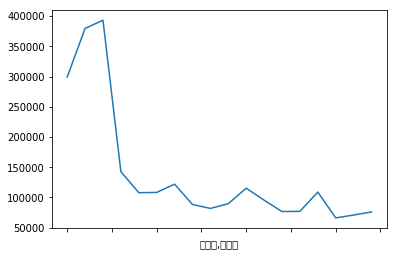

In [20]:
User = df.pivot_table(['金额'],index='客户编码',columns='购买年')
User.dropna().info()
df.groupby(['购买年','购买月']).金额.sum().plot()

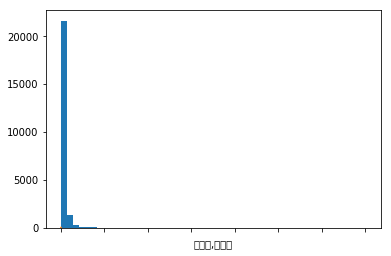

In [24]:
df.groupby('客户编码').金额.sum().hist(bins = 50)

df[df['金额'] == 0].groupby(['购买年','购买月']).数量.sum().plot()